In [3]:
import pandas as pd
import altair as alt
import numpy as np

In [4]:
main_df = pd.read_csv('Datasets/KOF_clean.csv')
dataset_list = ['CAC40-FRA-Clean', 'DAX30-DEU-Clean', 'HangSeng-HKG-Clean', 
    'Nikkei225-JPN-Clean', 'Shanghai-CHN-Clean', 'Nifty50-IND-Clean', 'S&P500-USA-Clean', 'MASI-MAR-Clean',
    'NASI-KEN-Clean', 'FTSE_JSE-ZAF-Clean']

countries_df = pd.DataFrame(columns=['year', 'YoY Change', 'code'])
for df_name in dataset_list:
    df = pd.read_csv('./Datasets/' + df_name + '.csv')
    countries_df = pd.concat([countries_df, df])

main_df = main_df.merge(countries_df, on=['year', 'code'])

# Create the lagged Volatility variable
main_df['volatility_lagged'] = main_df.groupby(by='code')['volatility'].shift(1)

# Drop the rows with missing values after shifting
main_df = main_df.dropna()
main_df

code       country  year  KOFGI  KOFGIdf  KOFGIdj  KOFEcGI  KOFEcGIdf  \
1    CHN         China  1996   45.0     45.0     45.0     35.0       31.0   
2    CHN         China  1997   47.0     46.0     48.0     36.0       34.0   
3    CHN         China  1998   49.0     49.0     49.0     37.0       34.0   
4    CHN         China  1999   51.0     50.0     51.0     38.0       36.0   
5    CHN         China  2000   52.0     51.0     53.0     40.0       39.0   
..   ...           ...   ...    ...      ...      ...      ...        ...   
261  ZAF  South Africa  2016   70.0     71.0     69.0     54.0       58.0   
262  ZAF  South Africa  2017   70.0     71.0     69.0     54.0       57.0   
263  ZAF  South Africa  2018   70.0     71.0     69.0     53.0       57.0   
264  ZAF  South Africa  2019   70.0     70.0     69.0     54.0       57.0   
265  ZAF  South Africa  2020   69.0     70.0     69.0     53.0       56.0   

     KOFEcGIdj  KOFTrGI  ...  KOFInGIdj  KOFCuGI  KOFCuGIdf  KOFCuGIdj  \
1         38.0     34.0  ...       30.0     29.0       26.0       32.0   
2         39.0     38.0  ...       32.0     31.0       27.0       34.0   
3         39.0     38.0  ...       40.0     41.0       45.0       37.0   
4         40.0     39.0  ...       44.0     44.0       45.0       42.0   
5         40.0     43.0  ...       48.0     46.0       46.0       45.0   
..         ...      ...  ...        ...      ...        ...        ...   
261       50.0     55.0  ...       74.0     62.0       54.0       69.0   
262       51.0     54.0  ...       72.0     62.0       55.0       70.0   
263       50.0     54.0  ...       73.0     63.0       55.0       70.0   
264       50.0     54.0  ...       74.0     63.0       55.0       72.0   
265       51.0     52.0  ...       74.0     62.0       53.0       72.0   

     KOFPoGI  KOFPoGIdf  KOFPoGIdj  YoY Change  volatility  volatility_lagged  
1       77.0       83.0       71.0   70.939074   42.479943          49.157737  
2       79.0       83.0       75.0   32.742025   34.194982          42.479943  
3       79.0       83.0       75.0   -7.755209   20.694992          34.194982  
4       80.0       83.0       78.0   24.919614   27.412952          20.694992  
5       81.0       83.0       79.0   49.567326   21.351896          27.412952  
..       ...        ...        ...         ...         ...                ...  
261     89.0       92.0       86.0    3.455327   16.850422          16.805152  
262     89.0       92.0       86.0   17.072496   10.114987          16.850422  
263     89.0       92.0       86.0  -14.175348   17.107491          10.114987  
264     88.0       90.0       86.0   12.589600   12.687050          17.107491  
265     89.0       92.0       86.0    4.784331   30.415292          12.687050  

[256 rows x 33 columns]

In [50]:
alt.Chart(main_df).mark_circle().encode(
    x='KOFFiGI',
    y='volatility',
    color='code',
    tooltip=['code', 'year', 'KOFFiGI']
).interactive()

alt.Chart(...)

In [7]:
from sklearn.cluster import KMeans

X = main_df.drop(['code', 'country', 'year'], axis=1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_df = main_df
cluster_df['cluster'] = kmeans.labels_

/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
cluster_df['vol_diff'] = cluster_df['volatility'] - cluster_df['volatility_lagged']
alt.Chart(cluster_df).mark_circle().encode(
    x=alt.X('year:O').scale(zero=False),
    y='vol_diff',
    color='cluster:N',
    tooltip=['code', 'year'])

alt.Chart(...)

In [18]:
financial_index_df = wb_df[['year', 'code', 'KOFFiGIdj', 'KOFFiGIdf', 'Pct Change', 'pre2008']]
financial_index_df['direction_bin'] = np.where(financial_index_df['Pct Change'] > 0, 1, 0)
financial_index_df

/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_30574/558930265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_index_df['direction_bin'] = np.where(financial_index_df['Pct Change'] > 0, 1, 0)


year code  KOFFiGIdj  KOFFiGIdf  Pct Change  pre2008  direction_bin
792   2007  ARE       75.0       79.0   52.131603        1              1
938   2009  ARE       77.0       81.0   24.574367        0              1
1018  2010  ARE       74.0       79.0   -6.788802        0              0
1098  2011  ARE       78.0       76.0  -16.478998        0              0
1179  2012  ARE       81.0       77.0   24.216708        0              1
...    ...  ...        ...        ...         ...      ...            ...
493   2002  ZWE       23.0       48.0   97.940002        1              1
565   2003  ZWE       21.0       47.0  -74.760002        1              0
639   2004  ZWE       23.0       46.0  -26.700001        1              0
713   2005  ZWE       21.0       46.0   36.582260        1              1
791   2006  ZWE       21.0       50.0  912.281279        1              1

[1740 rows x 7 columns]

In [445]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X = financial_index_df.drop(['code', 'pre2008', 'year'], axis=1)
tsne_obj = tsne.fit_transform(X)
tsne_df = pd.DataFrame(tsne_obj, columns=['z1', 'z2'])
tsne_df = pd.merge(tsne_df, financial_index_df, left_index=True, right_index=True)


In [446]:
alt.Chart(tsne_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title = "t-SNE Plot of Globalization Indice"
).interactive()

alt.Chart(...)

In [10]:
pre2008_df = main_df[main_df['year'] < 2008]
post2008_df = main_df[main_df['year'] >= 2008]

# Test difference in mean volatilities between pre and post 2008 years
from scipy.stats import ttest_ind
ttest_ind(pre2008_df['volatility'], post2008_df['volatility'])

TtestResult(statistic=1.3543599880202661, pvalue=0.17682515160103235, df=254.0)

In [11]:
wb_df = pd.read_csv('Datasets/KOF_World_Bank_merged.csv')
wb_df['pre2008'] = np.where(wb_df['year'] <= 2008, 1, 0)
wb_df = wb_df.sort_values(by=['code', 'year'])
wb_df['pct_change_lagged'] = wb_df.groupby(by='code')['Pct Change'].shift(1)
wb_df = wb_df.dropna()
wb_df

Pct Change  year code               country  KOFGI  KOFGIdf  KOFGIdj  \
792    52.131603  2007  ARE  United Arab Emirates   70.0     71.0     68.0   
938    24.574367  2009  ARE  United Arab Emirates   71.0     72.0     69.0   
1018   -6.788802  2010  ARE  United Arab Emirates   71.0     72.0     70.0   
1098  -16.478998  2011  ARE  United Arab Emirates   71.0     72.0     70.0   
1179   24.216708  2012  ARE  United Arab Emirates   73.0     75.0     72.0   
...          ...   ...  ...                   ...    ...      ...      ...   
565   -74.760002  2003  ZWE              Zimbabwe   46.0     51.0     41.0   
639   -26.700001  2004  ZWE              Zimbabwe   46.0     51.0     41.0   
713    36.582260  2005  ZWE              Zimbabwe   46.0     52.0     41.0   
791   912.281279  2006  ZWE              Zimbabwe   48.0     54.0     42.0   
869   -83.786962  2007  ZWE              Zimbabwe   48.0     55.0     42.0   

      KOFEcGI  KOFEcGIdf  KOFEcGIdj  ...  KOFInGIdf  KOFInGIdj  KOFCuGI  \
792      83.0       86.0       81.0  ...       75.0       69.0     79.0   
938      85.0       88.0       83.0  ...       73.0       70.0     79.0   
1018     83.0       86.0       81.0  ...       73.0       72.0     79.0   
1098     84.0       86.0       83.0  ...       74.0       73.0     74.0   
1179     85.0       86.0       85.0  ...       90.0       73.0     75.0   
...       ...        ...        ...  ...        ...        ...      ...   
565      37.0       46.0       27.0  ...       38.0       34.0     33.0   
639      37.0       48.0       26.0  ...       37.0       34.0     33.0   
713      37.0       49.0       25.0  ...       37.0       35.0     32.0   
791      38.0       51.0       25.0  ...       39.0       34.0     35.0   
869      39.0       55.0       23.0  ...       37.0       36.0     35.0   

      KOFCuGIdf  KOFCuGIdj  KOFPoGI  KOFPoGIdf  KOFPoGIdj  pre2008  \
792        94.0       67.0     54.0       49.0       58.0        1   
938        94.0       67.0     55.0       51.0       60.0        0   
1018       95.0       68.0     57.0       53.0       61.0        0   
1098       94.0       60.0     58.0       53.0       63.0        0   
1179       95.0       61.0     60.0       55.0       65.0        0   
...         ...        ...      ...        ...        ...      ...   
565        24.0       41.0     66.0       74.0       58.0        1   
639        24.0       42.0     65.0       72.0       58.0        1   
713        22.0       42.0     66.0       73.0       59.0        1   
791        27.0       42.0     68.0       74.0       62.0        1   
869        28.0       43.0     68.0       73.0       63.0        1   

      pct_change_lagged  
792          -44.586151  
938           52.131603  
1018          24.574367  
1098          -6.788802  
1179         -16.478998  
...                 ...  
565           97.940002  
639          -74.760002  
713          -26.700001  
791           36.582260  
869          912.281279  

[1823 rows x 33 columns]

In [12]:
ttest_ind(wb_df[wb_df['pre2008'] == 1]['Pct Change'], wb_df[wb_df['pre2008'] == 0]['Pct Change'])

TtestResult(statistic=4.413388190325129, pvalue=1.0772798912272949e-05, df=1821.0)

In [13]:
wb_df[wb_df['pre2008'] == 1]['Pct Change'].mean()

14.318800959495476

In [14]:
from statsmodels.regression.linear_model import OLS

X = wb_df.drop(['code', 'country', 'year', 'Pct Change'], axis=1)
X = wb_df[['pre2008', 'pct_change_lagged', 'KOFFiGI']]

y = wb_df['Pct Change']

model = OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Pct Change   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              41.95
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                    3.31e-26
Time:                        15:36:04   Log-Likelihood:                         -9345.8
No. Observations:                1823   AIC:                                  1.870e+04
Df Residuals:                    1820   BIC:                                  1.871e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pre2008              10.9969      1.887      5.829      0.000       7.297      14.697
pct_change_lagged    -0.0640      0.023     -2.736      0.006      -0.110      -0.018
KOFFiGI               0.0672      0.018      3.669      0.000       0.031       0.103
==============================================================================
Omnibus:                     2362.139   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1333024.465
Skew:                           6.507   Prob(JB):                         0.00
Kurtosis:                     134.834   Cond. No.                         139.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = wb_df[['pre2008', 'pct_change_lagged', 'KOFFiGI', 'KOFPoGI']]
y = wb_df['Pct Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

pred = reg.predict(X_test)
mean_squared_error(y_test, pred)

1464.0154326932573

In [20]:
wb_df = wb_df.sort_values(by=['code', 'year'])
wb_df['KOFFiGI_diff'] = wb_df.groupby(by='code')['KOFFiGI'].diff().shift(-1)
wb_df = wb_df.dropna()
wb_df[['year', 'code', 'KOFFiGI', 'KOFFiGI_diff']]

year code  KOFFiGI  KOFFiGI_diff
792   2007  ARE     76.0           2.0
938   2009  ARE     78.0          -2.0
1018  2010  ARE     76.0           1.0
1098  2011  ARE     77.0           2.0
1179  2012  ARE     79.0           2.0
...    ...  ...      ...           ...
419   2001  ZWE     36.0           0.0
493   2002  ZWE     36.0          -2.0
565   2003  ZWE     34.0           1.0
639   2004  ZWE     35.0          -1.0
713   2005  ZWE     34.0           1.0

[1657 rows x 4 columns]

In [21]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

X = financial_index_df.drop(['code', 'year', 'Pct Change'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf')

kpca_obj = kpca.fit_transform(X_scaled)
kpca_df = pd.DataFrame(kpca_obj, columns=['PC1', 'PC2'])
kpca_df = pd.merge(kpca_df, financial_index_df, left_index=True, right_index=True)
financial_index_df

year code  KOFFiGIdj  KOFFiGIdf  Pct Change  pre2008  direction_bin
792   2007  ARE       75.0       79.0   52.131603        1              1
938   2009  ARE       77.0       81.0   24.574367        0              1
1018  2010  ARE       74.0       79.0   -6.788802        0              0
1098  2011  ARE       78.0       76.0  -16.478998        0              0
1179  2012  ARE       81.0       77.0   24.216708        0              1
...    ...  ...        ...        ...         ...      ...            ...
493   2002  ZWE       23.0       48.0   97.940002        1              1
565   2003  ZWE       21.0       47.0  -74.760002        1              0
639   2004  ZWE       23.0       46.0  -26.700001        1              0
713   2005  ZWE       21.0       46.0   36.582260        1              1
791   2006  ZWE       21.0       50.0  912.281279        1              1

[1740 rows x 7 columns]

In [22]:
alt.Chart(kpca_df).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='Kernel PCA plot using the RBF kernel'
)

alt.Chart(...)

In [23]:
import umap
reducer = umap.UMAP()

X = financial_index_df.drop(['code', 'year', 'Pct Change', 'direction_bin'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

embedding = reducer.fit_transform(X_scaled)
embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])

/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
embedding_df['direction_bin'] = financial_index_df['direction_bin'].values
embedding_df['code'] = financial_index_df['code'].values
embedding_df['year'] = financial_index_df['year'].values
alt.Chart(embedding_df).mark_circle().encode(
    x='x',
    y='y',
    color='direction_bin:N',
).properties(
    title='UMAP projection of the Financial Globalization Indices, and pre/post financial crisis',
)

alt.Chart(...)

In [26]:
alt.Chart(wb_df).mark_circle().encode(
    x='KOFGI',
    y='Pct Change',
    color='code:N'
)

alt.Chart(...)

In [27]:
wb_df[wb_df['Pct Change'] > 200]

Pct Change  year code             country  KOFGI  KOFGIdf  KOFGIdj  \
261       284.0  1999  RUS  Russian Federation   62.0     62.0     62.0   
270       254.5  1999  TUR             Turkiye   61.0     54.0     68.0   

     KOFEcGI  KOFEcGIdf  KOFEcGIdj  ...  KOFInGIdj  KOFCuGI  KOFCuGIdf  \
261     51.0       60.0       41.0  ...       56.0     54.0       40.0   
270     51.0       34.0       69.0  ...       57.0     44.0       54.0   

     KOFCuGIdj  KOFPoGI  KOFPoGIdf  KOFPoGIdj  pre2008  pct_change_lagged  \
261       68.0     88.0       87.0       89.0        1         -84.230003   
270       35.0     86.0       82.0       89.0        1         -53.122101   

     KOFFiGI_diff  
261           6.0  
270           1.0  

[2 rows x 34 columns]

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X = financial_index_df.drop(['code', 'year', 'Pct Change', 'direction_bin'], axis=1)

tsne_obj = tsne.fit_transform(X)
tsne_df = pd.DataFrame(tsne_obj, columns=['z1', 'z2'])
tsne_df = pd.merge(tsne_df, financial_index_df, left_index=True, right_index=True)
X

KOFFiGIdj  KOFFiGIdf  pre2008
792        75.0       79.0        1
938        77.0       81.0        0
1018       74.0       79.0        0
1098       78.0       76.0        0
1179       81.0       77.0        0
...         ...        ...      ...
493        23.0       48.0        1
565        21.0       47.0        1
639        23.0       46.0        1
713        21.0       46.0        1
791        21.0       50.0        1

[1740 rows x 3 columns]

In [29]:
alt.Chart(tsne_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='TSNE plot, n_components=2',
)

alt.Chart(...)

In [30]:
financial_index_df[(financial_index_df['code'] == 'TUN')]
fin_excl_out = financial_index_df[(financial_index_df['code'] != 'TUN') & (financial_index_df['year'] != 2018)]
fin_excl_out = fin_excl_out[(fin_excl_out['code'] != 'NGA') & (fin_excl_out['year'] != 2017)]

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X = wb_df.drop(['code', 'year', 'country', 'country_duplicated', 'pre2008'], axis=1)
pca_obj = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_obj, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df = pd.merge(pca_df, wb_df, left_index=True, right_index=True)

KeyError: "['country_duplicated'] not found in axis"

In [32]:
alt.Chart(pca_df).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='PCA plot',
)

NameError: name 'pca_df' is not defined

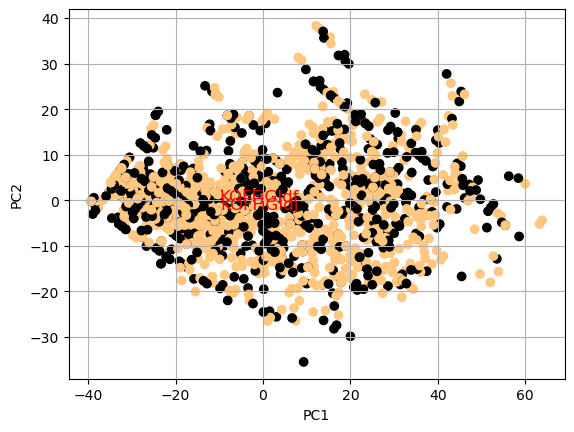

KOFFiGIdj  KOFFiGIdf  Pct Change  direction_bin
1018       74.0       79.0   -6.788802              0
1098       78.0       76.0  -16.478998              0
1179       81.0       77.0   24.216708              1
1260       82.0       79.0   29.592792              1
1341       80.0       80.0   12.742393              1
...         ...        ...         ...            ...
565        21.0       47.0  -74.760002              0
639        23.0       46.0  -26.700001              0
713        21.0       46.0   36.582260              1
791        21.0       50.0  912.281279              1
869        20.0       52.0  -83.786962              0

[1657 rows x 4 columns]

In [492]:
import matplotlib.pyplot as plt
y = financial_index_df['direction_bin'].values
x = financial_index_df.drop(['code', 'year', 'Pct Change'], axis=1)

pca = PCA(n_components=2)
pca.fit(x)
# Code to make a biplot
# Pulled from: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot 
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]

    plt.scatter(xs ,ys, c = y, cmap='copper') #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.9)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center', fontsize='large')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(pca.transform(x), pca.components_, labels=['KOFFiGIdj', 'KOFFiGIdf', 'Pct Change']) 
plt.show()
financial_index_df.drop(['code', 'year', 'pre2008'], axis=1)

In [252]:
pca.components_

array([[ 6.00608691e-02, -1.51527938e-01, -1.53631302e-01,
        -1.49515166e-01, -1.92514490e-01, -1.78496479e-01,
        -2.06658375e-01, -1.95780683e-01, -1.35867154e-01,
        -2.56120438e-01, -1.89147985e-01, -2.21101506e-01,
        -1.57298087e-01, -2.15043448e-01, -2.45402418e-01,
        -1.84883207e-01, -2.17416014e-01, -2.63882855e-01,
        -1.72630475e-01, -1.80498378e-01, -1.66378032e-01,
        -1.94572533e-01, -2.46450616e-01, -3.07740877e-01,
        -1.87750759e-01, -4.80188619e-02, -3.91626864e-02,
        -5.70191373e-02,  2.81852397e-02,  5.89735560e-04],
       [ 9.92102515e-01,  1.05857454e-02,  1.11307736e-02,
         1.01682096e-02,  1.93677292e-02,  1.61993562e-02,
         2.19870821e-02,  2.42639058e-02,  1.47445198e-02,
         3.44868634e-02,  1.32652863e-02,  1.79918674e-02,
         9.13418862e-03,  4.13913514e-03,  3.58127581e-03,
         5.16824138e-03,  7.78007620e-03,  1.56072363e-02,
         2.50274737e-04, -1.25619048e-02, -2.91377621e-

In [36]:

#pca.components_[0]
wb_df

Pct Change  year code               country  KOFGI  KOFGIdf  KOFGIdj  \
792    52.131603  2007  ARE  United Arab Emirates   70.0     71.0     68.0   
938    24.574367  2009  ARE  United Arab Emirates   71.0     72.0     69.0   
1018   -6.788802  2010  ARE  United Arab Emirates   71.0     72.0     70.0   
1098  -16.478998  2011  ARE  United Arab Emirates   71.0     72.0     70.0   
1179   24.216708  2012  ARE  United Arab Emirates   73.0     75.0     72.0   
...          ...   ...  ...                   ...    ...      ...      ...   
419   134.276672  2001  ZWE              Zimbabwe   46.0     50.0     42.0   
493    97.940002  2002  ZWE              Zimbabwe   46.0     53.0     40.0   
565   -74.760002  2003  ZWE              Zimbabwe   46.0     51.0     41.0   
639   -26.700001  2004  ZWE              Zimbabwe   46.0     51.0     41.0   
713    36.582260  2005  ZWE              Zimbabwe   46.0     52.0     41.0   

      KOFEcGI  KOFEcGIdf  KOFEcGIdj  ...  KOFInGIdj  KOFCuGI  KOFCuGIdf  \
792      83.0       86.0       81.0  ...       69.0     79.0       94.0   
938      85.0       88.0       83.0  ...       70.0     79.0       94.0   
1018     83.0       86.0       81.0  ...       72.0     79.0       95.0   
1098     84.0       86.0       83.0  ...       73.0     74.0       94.0   
1179     85.0       86.0       85.0  ...       73.0     75.0       95.0   
...       ...        ...        ...  ...        ...      ...        ...   
419      37.0       42.0       31.0  ...       35.0     33.0       23.0   
493      39.0       51.0       28.0  ...       33.0     33.0       26.0   
565      37.0       46.0       27.0  ...       34.0     33.0       24.0   
639      37.0       48.0       26.0  ...       34.0     33.0       24.0   
713      37.0       49.0       25.0  ...       35.0     32.0       22.0   

      KOFCuGIdj  KOFPoGI  KOFPoGIdf  KOFPoGIdj  pre2008  pct_change_lagged  \
792        67.0     54.0       49.0       58.0        1         -44.586151   
938        67.0     55.0       51.0       60.0        0          52.131603   
1018       68.0     57.0       53.0       61.0        0          24.574367   
1098       60.0     58.0       53.0       63.0        0          -6.788802   
1179       61.0     60.0       55.0       65.0        0         -16.478998   
...         ...      ...        ...        ...      ...                ...   
419        44.0     66.0       75.0       57.0        1         -24.571924   
493        40.0     64.0       74.0       55.0        1         134.276672   
565        41.0     66.0       74.0       58.0        1          97.940002   
639        42.0     65.0       72.0       58.0        1         -74.760002   
713        42.0     66.0       73.0       59.0        1         -26.700001   

      KOFFiGI_diff  
792            2.0  
938           -2.0  
1018           1.0  
1098           2.0  
1179           2.0  
...            ...  
419            0.0  
493           -2.0  
565            1.0  
639           -1.0  
713            1.0  

[1657 rows x 34 columns]

In [37]:
model_df = wb_df.drop(['country_duplicated', 'pct_change_lagged'], axis=1, errors='ignore')
#encode 1 as positive change, 0 as negative change
model_df['direction_bin'] = np.where(model_df['Pct Change'] > 0, 1, 0)
US_direction_bin = model_df[model_df['code'] == 'USA'].groupby(by='year')['direction_bin'].first()
model_df['US_pct_change'] = wb_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['Pct Change'].first())
model_df
#wb_df['US_pct_change_lagged'] = wb_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['Pct Change'].shift(1))

Pct Change  year code               country  KOFGI  KOFGIdf  KOFGIdj  \
792    52.131603  2007  ARE  United Arab Emirates   70.0     71.0     68.0   
938    24.574367  2009  ARE  United Arab Emirates   71.0     72.0     69.0   
1018   -6.788802  2010  ARE  United Arab Emirates   71.0     72.0     70.0   
1098  -16.478998  2011  ARE  United Arab Emirates   71.0     72.0     70.0   
1179   24.216708  2012  ARE  United Arab Emirates   73.0     75.0     72.0   
...          ...   ...  ...                   ...    ...      ...      ...   
419   134.276672  2001  ZWE              Zimbabwe   46.0     50.0     42.0   
493    97.940002  2002  ZWE              Zimbabwe   46.0     53.0     40.0   
565   -74.760002  2003  ZWE              Zimbabwe   46.0     51.0     41.0   
639   -26.700001  2004  ZWE              Zimbabwe   46.0     51.0     41.0   
713    36.582260  2005  ZWE              Zimbabwe   46.0     52.0     41.0   

      KOFEcGI  KOFEcGIdf  KOFEcGIdj  ...  KOFCuGI  KOFCuGIdf  KOFCuGIdj  \
792      83.0       86.0       81.0  ...     79.0       94.0       67.0   
938      85.0       88.0       83.0  ...     79.0       94.0       67.0   
1018     83.0       86.0       81.0  ...     79.0       95.0       68.0   
1098     84.0       86.0       83.0  ...     74.0       94.0       60.0   
1179     85.0       86.0       85.0  ...     75.0       95.0       61.0   
...       ...        ...        ...  ...      ...        ...        ...   
419      37.0       42.0       31.0  ...     33.0       23.0       44.0   
493      39.0       51.0       28.0  ...     33.0       26.0       40.0   
565      37.0       46.0       27.0  ...     33.0       24.0       41.0   
639      37.0       48.0       26.0  ...     33.0       24.0       42.0   
713      37.0       49.0       25.0  ...     32.0       22.0       42.0   

      KOFPoGI  KOFPoGIdf  KOFPoGIdj  pre2008  KOFFiGI_diff  direction_bin  \
792      54.0       49.0       58.0        1           2.0              1   
938      55.0       51.0       60.0        0          -2.0              1   
1018     57.0       53.0       61.0        0           1.0              0   
1098     58.0       53.0       63.0        0           2.0              0   
1179     60.0       55.0       65.0        0           2.0              1   
...       ...        ...        ...      ...           ...            ...   
419      66.0       75.0       57.0        1           0.0              1   
493      64.0       74.0       55.0        1          -2.0              1   
565      66.0       74.0       58.0        1           1.0              0   
639      65.0       72.0       58.0        1          -1.0              0   
713      66.0       73.0       59.0        1           1.0              1   

      US_pct_change  
792        3.529202  
938       23.453817  
1018      12.782079  
1098      -0.002480  
1179      13.405690  
...             ...  
419      -13.042456  
493      -23.366249  
565       26.380037  
639        8.993540  
713        3.001582  

[1657 rows x 35 columns]

In [47]:
test_df['US_FIdj'] = test_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['KOFFiGIdj'].first())
test_df['US_FIdf'] = test_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['KOFFiGIdf'].first())
test_df.dropna(inplace=True)
test_df

/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_30574/2542675048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['US_FIdj'] = test_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['KOFFiGIdj'].first())
/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_30574/2542675048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['US_FIdf'] = test_df['year'].map(wb_df[wb_df['code'] == 'USA'].groupby(by='year')['KOFFiGIdf'].first())
/var/folders/1j/4c9y4tt55lz4k_pp

year code  KOFFiGIdj  KOFFiGIdf  Pct Change  pre2008  US_pct_change  \
792   2007  ARE       75.0       79.0   52.131603        1       3.529202   
938   2009  ARE       77.0       81.0   24.574367        0      23.453817   
1018  2010  ARE       74.0       79.0   -6.788802        0      12.782079   
1098  2011  ARE       78.0       76.0  -16.478998        0      -0.002480   
1179  2012  ARE       81.0       77.0   24.216708        0      13.405690   
...    ...  ...        ...        ...         ...      ...            ...   
419   2001  ZWE       28.0       44.0  134.276672        1     -13.042456   
493   2002  ZWE       23.0       48.0   97.940002        1     -23.366249   
565   2003  ZWE       21.0       47.0  -74.760002        1      26.380037   
639   2004  ZWE       23.0       46.0  -26.700001        1       8.993540   
713   2005  ZWE       21.0       46.0   36.582260        1       3.001582   

      direction_bin  US_FIdj  US_FIdf  
792               1     82.0     79.0  
938               1     75.0     74.0  
1018              0     76.0     75.0  
1098              0     76.0     75.0  
1179              1     76.0     75.0  
...             ...      ...      ...  
419               1     90.0     61.0  
493               1     84.0     61.0  
565               0     83.0     64.0  
639               0     84.0     70.0  
713               1     80.0     73.0  

[1657 rows x 10 columns]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = test_df[test_df['code'] != 'USA'].drop(['code', 'year', 'Pct Change', 'direction_bin', 'pre2008'], axis=1)
y = test_df[test_df['code'] != 'USA']['direction_bin'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

lr.score(X_test, y_test)
X_test

KOFFiGIdj  KOFFiGIdf  US_pct_change  US_FIdj  US_FIdf
1506       79.0       88.0       9.535016     81.0     76.0
329        75.0       59.0     -10.139187     89.0     64.0
767        86.0       97.0      13.619200     80.0     77.0
475        73.0       49.0     -23.366249     84.0     61.0
844        65.0       49.0       3.529202     82.0     79.0
...         ...        ...            ...      ...      ...
1261       30.0       45.0      29.601250     76.0     76.0
585        71.0       45.0       8.993540     84.0     70.0
992        83.0       95.0      23.453817     75.0     74.0
1435       44.0       48.0      -0.726602     77.0     76.0
386        56.0       72.0     -13.042456     90.0     61.0

[327 rows x 5 columns]

In [50]:
from sklearn.svm import SVC


svc = SVC(kernel='rbf').fit(X_train, y_train)
svc.score(X_test, y_test)

0.7370030581039755

In [52]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 80, 50), max_iter=10000, random_state=0).fit(X_train, y_train)
mlp.score(X_test, y_test)

0.7400611620795107

In [559]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.704 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.0s


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.572 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.572 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.570 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.574 total time=   0.0s
[CV 3/5] END .......C=0.1, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             verbose=3)

In [560]:
grid.score(X_test, y_test)

0.7225433526011561

In [561]:
# Grid search for MLP
param_grid = {'hidden_layer_sizes': [(100, 100, 80, 50), (100, 80, 50), (100, 50), (100), (80, 50), (50)]}

nn_grid = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, refit=True, verbose=3)
nn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.711 total time=  13.9s
[CV 2/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.653 total time=   2.9s
[CV 3/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.715 total time=  20.9s
[CV 4/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.772 total time=  14.4s
[CV 5/5] END hidden_layer_sizes=(100, 100, 80, 50);, score=0.743 total time=  13.1s
[CV 1/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.718 total time=   7.6s


/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



[CV 2/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.671 total time=  15.8s
[CV 3/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.693 total time=   5.0s
[CV 4/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.761 total time=   4.1s
[CV 5/5] END ..hidden_layer_sizes=(100, 80, 50);, score=0.634 total time=  14.6s


/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



[CV 1/5] END ......hidden_layer_sizes=(100, 50);, score=0.708 total time=   1.9s
[CV 2/5] END ......hidden_layer_sizes=(100, 50);, score=0.679 total time=   9.2s
[CV 3/5] END ......hidden_layer_sizes=(100, 50);, score=0.682 total time=   1.5s
[CV 4/5] END ......hidden_layer_sizes=(100, 50);, score=0.670 total time=  11.0s


In [552]:
nn_grid.score(X_test, y_test)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- US_figi
Feature names seen at fit time, yet now missing:
- pre2008


In [429]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_test, y_test)

0.72

In [498]:
from sklearn.cluster import SpectralClustering

x = financial_index_df.drop(['code', 'year', 'Pct Change', 'direction_bin'], axis=1)
y = financial_index_df['direction_bin'].values

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=0).fit(x)
sc.labels_
test_spectral = financial_index_df
test_spectral['cluster'] = sc.labels_
test_spectral

/var/folders/1j/4c9y4tt55lz4k_ppwcz53ks80000gn/T/ipykernel_31924/3493559538.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_spectral['cluster'] = sc.labels_


year code  KOFFiGIdj  KOFFiGIdf  Pct Change  pre2008  direction_bin  \
1018  2010  ARE       74.0       79.0   -6.788802        0              0   
1098  2011  ARE       78.0       76.0  -16.478998        0              0   
1179  2012  ARE       81.0       77.0   24.216708        0              1   
1260  2013  ARE       82.0       79.0   29.592792        0              1   
1341  2014  ARE       80.0       80.0   12.742393        0              1   
...    ...  ...        ...        ...         ...      ...            ...   
565   2003  ZWE       21.0       47.0  -74.760002        1              0   
639   2004  ZWE       23.0       46.0  -26.700001        1              0   
713   2005  ZWE       21.0       46.0   36.582260        1              1   
791   2006  ZWE       21.0       50.0  912.281279        1              1   
869   2007  ZWE       20.0       52.0  -83.786962        1              0   

      cluster  
1018        0  
1098        0  
1179        0  
1260        0  
1341        0  
...       ...  
565         1  
639         1  
713         1  
791         1  
869         1  

[1657 rows x 8 columns]

In [501]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=5, n_components=2)
iso_obj = iso.fit_transform(x)
iso_df = pd.DataFrame(iso_obj, columns=['z1', 'z2'])
iso_df = pd.merge(iso_df, financial_index_df, left_index=True, right_index=True)

/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/andrew/anaconda3/envs/dsl/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficie

In [502]:
alt.Chart(iso_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='Isomap plot, n_components=2',
)

alt.Chart(...)

In [503]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
se_obj = se.fit_transform(x)
se_df = pd.DataFrame(se_obj, columns=['z1', 'z2'])
se_df = pd.merge(se_df, financial_index_df, left_index=True, right_index=True)

In [504]:
alt.Chart(se_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='Spectral Embedding plot, n_components=2',
)

alt.Chart(...)

In [505]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
lle_obj = lle.fit_transform(x)
lle_df = pd.DataFrame(lle_obj, columns=['z1', 'z2'])
lle_df = pd.merge(lle_df, financial_index_df, left_index=True, right_index=True)

In [506]:
alt.Chart(lle_df).mark_circle().encode(
    x='z1',
    y='z2',
    color='direction_bin:N',
    tooltip=['code', 'year']
).properties(
    title='Locally Linear Embedding plot, n_components=2',
)

alt.Chart(...)

In [538]:
alt.Chart(wb_df).mark_circle().encode(
    x=alt.X('KOFGI').scale(zero=False),
    y='Pct Change',
    color='code:N'
)

alt.Chart(...)

<Axes: >

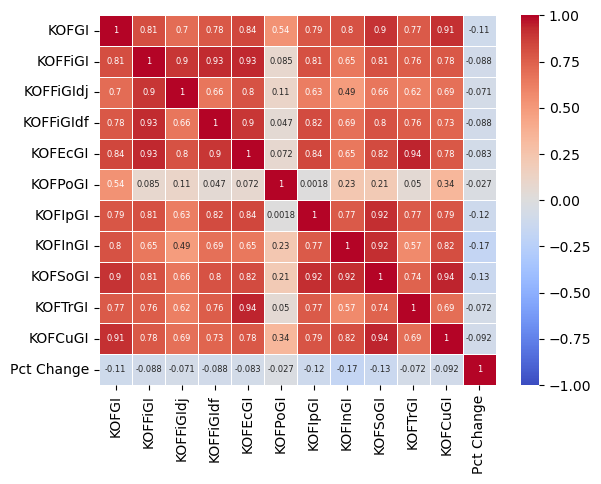

In [545]:
#wb_df cor plot
import seaborn as sns
corr = wb_df[['KOFGI', 'KOFFiGI', 'KOFFiGIdj', 'KOFFiGIdf', 'KOFEcGI', 'KOFPoGI', 'KOFIpGI', 'KOFInGI', 'KOFSoGI', 'KOFTrGI', 'KOFCuGI', 'Pct Change']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            annot_kws={"size": 6},
            vmin=-1,
            vmax=1)


In [510]:
X_pre_post = financial_index_df.drop(['code', 'year', 'pre2008', 'cluster'], axis=1)
y_pre_post = financial_index_df['pre2008'].values

X_train, X_test, y_train, y_test = train_test_split(X_pre_post, y_pre_post, test_size=0.2, random_state=0)

In [548]:
ann_pre_post = MLPClassifier(hidden_layer_sizes=(100, 80, 50), max_iter=10000, random_state=0).fit(X_train, y_train)
ann_pre_post.score(X_test, y_test)

0.6820809248554913

In [ ]:
wb_df-wbwww

In [ ]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Assuming kof_df is already loaded and sorted by year
kof_df = wb_df

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data = world.merge(kof_df, left_on='iso_a3', right_on='code')

# Determine the fixed range for the KOFGI scores
kofgi_range = [kof_df['KOFGI'].min(), kof_df['KOFGI'].max()]

# Create the choropleth map with a fixed color scale
fig = px.choropleth(world_data,
                    geojson=world_data.geometry,
                    locations=world_data.index,
                    color='KOFGI',
                    hover_name='country',
                    animation_frame='year',
                    color_continuous_scale='OrRd',
                    range_color=kofgi_range,  # Fix the color scale to the range of KOFGI
                    projection='natural earth')

# Update the layout to ensure the globe is visible
fig.update_geos(visible=True, showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

# Update the layout for the title and margins
fig.update_layout(title='Globalisation Index Over Years',
                  margin={"r":0,"t":30,"l":0,"b":0})

# Create and add the slider for animation
steps = [dict(method='animate',
              args=[[year], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate'}],
              label=str(year)) for year in sorted(kof_df['year'].unique())]

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

fig.update_layout(sliders=sliders)

# Display the figure
fig.show()